# Worksheet 16

Name: Themistoklis Nikas

UID: U91062110  

### Topics

- Support Vector Machines (Non-linear case)

## Support Vector Machines

Follow along in class to implement the perceptron algorithm and create an animation of the algorithm.

a) As we saw in class, the form
$$w^T x + b = 0$$
while simple, does not expose the inner product `<x_i, x_j>` which we know `w` depends on, having done the math. This is critical to applying the "kernel trick" which allows for learning non-linear decision boundaries. Let's modify the above algorithm to use the form
$$\sum_i \alpha_i <x_i, x> + b = 0$$

In [1]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

TEMPFILE = "temp.png"
CENTERS = [[0, 1], [1, 0]]

epochs = 100
learning_rate = .05
expanding_rate = .99
retracting_rate = 1.1

X, labels = datasets.make_blobs(n_samples=10, centers=CENTERS, cluster_std=0.2, random_state=0)
Y = np.array(list(map(lambda x : -1 if x == 0 else 1, labels.tolist())))

alpha_i = np.zeros((len(X),))
b = 0

def snap(x, alpha_i, b, error):
    # create a mesh to plot in
    h = .01  # step size in the mesh
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    meshData = np.c_[xx.ravel(), yy.ravel()]
    cs = np.array([x for x in 'gb'])
    fig, ax = plt.subplots()
    ax.scatter(X[:,0],X[:,1],color=cs[labels].tolist(), s=50, alpha=0.8)

    if error:
        ax.add_patch(plt.Circle((x[0], x[1]), .12, color='r',fill=False))
    else:
        ax.add_patch(plt.Circle((x[0], x[1]), .12, color='y',fill=False))
   
    Z = predict_many(alpha_i, b, meshData)
    Z = np.array([0 if z <=0 else 1 for z in Z]).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=.5, cmap=plt.cm.Paired)
    fig.savefig(TEMPFILE)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))

def predict_many(alpha_i, b, Z):
    res = []
    for i in range(len(Z)):
        res.append(predict(alpha_i, b, Z[i]))
    return np.array(res)

def predict(alpha_i, b, x):
    wx = 0
    for j in range(len(X)):
        wx += alpha_i[j] * np.dot(X[j], x)
    return wx + b

images = []
for _ in range(epochs):
    # pick a point from X at random
    i = np.random.randint(0, len(X))
    error = False
    x, y = X[i], Y[i]
    
    ypred = predict(alpha_i, b, x)
    if (ypred > 0 and y > 0) or (ypred < 0 and y < 0):
        # classified correctly
        if ypred < 1 and ypred > -1:
            # in the street / street is too wide
            alpha_i[i] += y * learning_rate
            alpha_i = alpha_i * retracting_rate           
            b += y * learning_rate * retracting_rate
        else:
            # street is too narrow
            alpha_i = alpha_i * expanding_rate
            b *= expanding_rate
    else:
        # misclassified
        alpha_i[i] += y * learning_rate
        alpha_i = alpha_i * expanding_rate
        b += y * learning_rate * expanding_rate
        error = True
        
    images.append(snap(x, alpha_i, b, error))

images[0].save(
    'svm_dual.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=100
)

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


Write a configurable kernel function to apply in lieu of the dot product. Try it out on a dataset that is not linearly separable.

In [4]:
def snap(x, alpha_i, b, error):
    # create a mesh to plot in
    h = .01  # step size in the mesh
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    meshData = np.c_[xx.ravel(), yy.ravel()]
    cs = np.array([x for x in 'gb'])
    fig, ax = plt.subplots()
    ax.scatter(X[:,0],X[:,1],color=cs[labels].tolist(), s=50, alpha=0.8)

    if error:
        ax.add_patch(plt.Circle((x[0], x[1]), .12, color='r',fill=False))
    else:
        ax.add_patch(plt.Circle((x[0], x[1]), .12, color='y',fill=False))
   
    Z = predict_many(alpha_i, b, meshData)
    Z = np.array([0 if z <=0 else 1 for z in Z]).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=.5, cmap=plt.cm.Paired)
    fig.savefig(TEMPFILE)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))

def predict_many(alpha_i, b, Z):
    res = []
    for i in range(len(Z)):
        res.append(predict(alpha_i, b, Z[i]))
    return np.array(res)

def polynomial(x_i, x_j, c, n):
    return (np.dot(x_i, x_j) + c) ** n

def predict(alpha_i, b, x):
    wx = 0
    for j in range(len(X)):
        wx += alpha_i[j] * polynomial(X[j], x, 1, N)
    return wx + b

# create the XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([-1, 1, 1, -1])
labels = np.array([0, 1, 1, 0])
alpha_i = np.zeros((len(X),))
b = 0

TEMPFILE = "temp.png"
N = 2
epochs = 100
learning_rate = .1
expanding_rate = .99
retracting_rate = 1.1
images = []
for _ in range(epochs):
    # pick a point from X at random
    i = np.random.randint(0, len(X))
    error = False
    x, y = X[i], Y[i]
    
    ypred = predict(alpha_i, b, x)
    if (ypred > 0 and y > 0) or (ypred < 0 and y < 0):
        # classified correctly
        if ypred < 1 and ypred > -1:
            # in the street / street is too wide
            alpha_i[i] += y * learning_rate
            alpha_i = alpha_i * retracting_rate           
            b += y * learning_rate * retracting_rate
        else:
            # street is too narrow
            alpha_i = alpha_i * expanding_rate
            b *= expanding_rate
    else:
        # misclassified
        alpha_i[i] += y * learning_rate
        alpha_i = alpha_i * expanding_rate
        b += y * learning_rate * expanding_rate
        error = True
        
    images.append(snap(x, alpha_i, b, error))

images[0].save(
    'non_linear.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=100
)

b) Assume we fit an SVM using a polynomial Kernel function and it seems to overfit the data. How would you adjust the tuning parameter `n` of the kernel function?

Higher values of "n" result in more complex decision boundaries, while lower values lead to simpler decision boundaries. So we would decrease the value of n in order to decrease the degree of the polynomial.

c) Assume we fit an SVM using a RBF Kernel function and it seems to underfit the data. How would you adjust the tuning parameter `sigma` of the kernel function?

Since the tuning parameter sigma (σ) corresponds to the width of the Gaussian kernel, we would increase it's value.

d) Tune the parameter of a specific Kernel function, to fit an SVM (using your code above) to the following dataset:

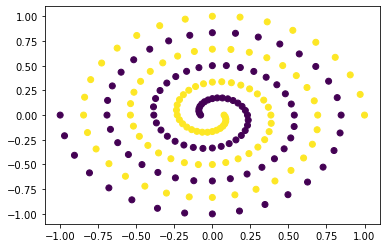

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("spiral.data")
x, y = data[:, :2], data[:, 2]

plt.scatter(x[:,0], x[:,1], c=y)

In [2]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

def snap(x, alpha_i, b, error):
    # create a mesh to plot in
    h = .1  # step size in the mesh
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    meshData = np.c_[xx.ravel(), yy.ravel()]
    cs = np.array([x for x in 'gb'])
    fig, ax = plt.subplots()
    ax.scatter(X[:,0],X[:,1],color=cs[labels].tolist(), s=50, alpha=0.8)

    if error:
        ax.add_patch(plt.Circle((x[0], x[1]), .12, color='r',fill=False))
    else:
        ax.add_patch(plt.Circle((x[0], x[1]), .12, color='y',fill=False))
   
    Z = predict_many(alpha_i, b, meshData)
    Z = np.array([0 if z <=0 else 1 for z in Z]).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=.5, cmap=plt.cm.Paired)
    fig.savefig(TEMPFILE)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))

def predict_many(alpha_i, b, Z):
    res = []
    for i in range(len(Z)):
        res.append(predict(alpha_i, b, Z[i], sigma))
    return np.array(res)

# Radial Basis Function
def predict(alpha_i, b, x, sigma):
    wx = 0
    for j in range(len(X)):
        wx += alpha_i[j] * np.exp(-np.linalg.norm(X[j]-x)**2 / (2 * sigma**2))
    return wx + b

data = np.loadtxt("spiral.data")
X = data[:, :2]
Y = data[:, 2]
# get the labels
labels = np.array([0 if y == 1 else 1 for y in Y])
alpha_i = np.zeros((len(X),))
b = 0

TEMPFILE = "temp.png"
epochs = 2000
learning_rate = 1
expanding_rate = .99
retracting_rate = 1.1
sigma = .1
images = []
for e in range(epochs):
    print(e)
    # pick a point from X at random
    i = np.random.randint(0, len(X))
    error = False
    x, y = X[i], Y[i]
    
    ypred = predict(alpha_i, b, x, sigma)
    if (ypred > 0 and y > 0) or (ypred < 0 and y < 0):
        # classified correctly
        if ypred < 1 and ypred > -1:
            # in the street / street is too wide
            alpha_i[i] += y * learning_rate
            alpha_i = alpha_i * retracting_rate           
            b += y * learning_rate * retracting_rate
        else:
            # street is too narrow
            alpha_i = alpha_i * expanding_rate
            b *= expanding_rate
    else:
        # misclassified
        alpha_i[i] += y * learning_rate
        alpha_i = alpha_i * expanding_rate
        b += y * learning_rate * expanding_rate
        error = True
    
    images.append(snap(x, alpha_i, b, error))

images[0].save(
    'spectral.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=100
)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27